In [2]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches.csv


In [4]:
import pandas as pd

# Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Preview first few rows
print("Matches Dataset:")
print(matches.head())

print("\nDeliveries Dataset:")
print(deliveries.head())

Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrise

In [5]:
# Missing values in matches
print("\nMissing values in matches dataset:")
print(matches.isnull().sum())

# Missing values in deliveries
print("\nMissing values in deliveries dataset:")
print(deliveries.isnull().sum())



Missing values in matches dataset:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Missing values in deliveries dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismi

In [6]:
# Duplicates in matches
matches_duplicates = matches.duplicated().sum()
print(f"\nDuplicate rows in matches dataset: {matches_duplicates}")

# Duplicates in deliveries
deliveries_duplicates = deliveries.duplicated().sum()
print(f"Duplicate rows in deliveries dataset: {deliveries_duplicates}")



Duplicate rows in matches dataset: 0
Duplicate rows in deliveries dataset: 1


In [7]:
# Unique team names from both team1 and team2
team_names = set(matches['team1'].unique()) | set(matches['team2'].unique())
print("\nUnique team names:")
print(sorted(team_names))



Unique team names:
['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [8]:
# Unique batsmen and bowlers
unique_batsmen = deliveries['batsman'].unique()
unique_bowlers = deliveries['bowler'].unique()

print(f"\nTotal unique batsmen: {len(unique_batsmen)}")
print(f"Total unique bowlers: {len(unique_bowlers)}")

# Optionally sort and print top 10
print("\nSample Batsmen:")
print(sorted(unique_batsmen)[:10])



Total unique batsmen: 461
Total unique bowlers: 356

Sample Batsmen:
['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A Flintoff', 'A Kumble', 'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra']


In [9]:
# Replace inconsistent name if found
matches['team1'] = matches['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


Matches per season:
 season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: count, dtype: int64


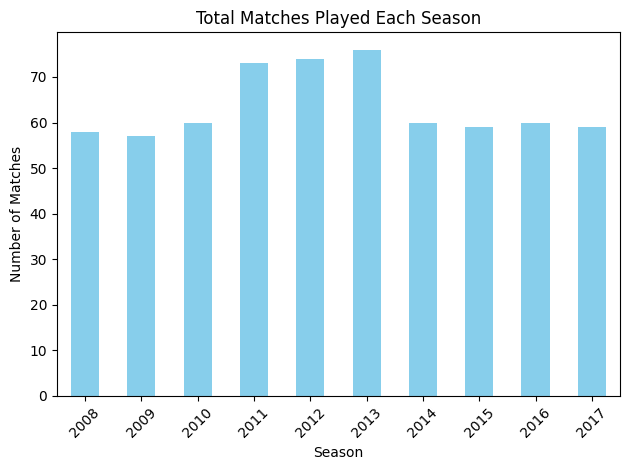

In [10]:
matches_per_season = matches['season'].value_counts().sort_index()
print("Matches per season:\n", matches_per_season)

# Plotting
import matplotlib.pyplot as plt
matches_per_season.plot(kind='bar', color='skyblue', title='Total Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most successful teams:
 winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64


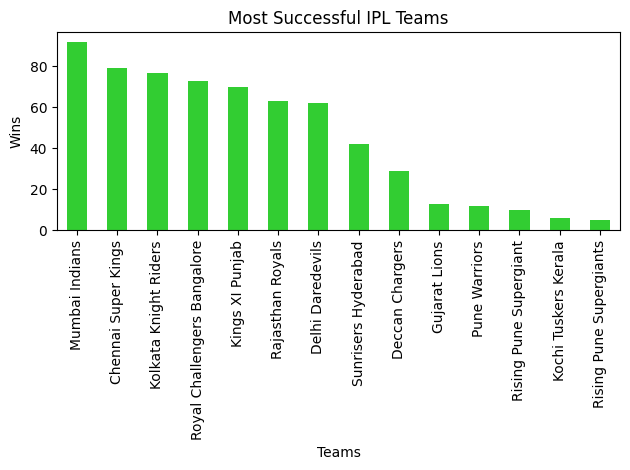

In [11]:
most_wins = matches['winner'].value_counts()
print("Most successful teams:\n", most_wins)

# Plot
most_wins.plot(kind='bar', color='limegreen', title='Most Successful IPL Teams')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [12]:
# Number of times toss winner also won the match
toss_and_match_winner = matches[matches['toss_winner'] == matches['winner']]
toss_impact_pct = (len(toss_and_match_winner) / len(matches)) * 100
print(f"Toss winner also won the match in {toss_impact_pct:.2f}% of the cases.")


Toss winner also won the match in 51.10% of the cases.


Matches played per venue:
 venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Re

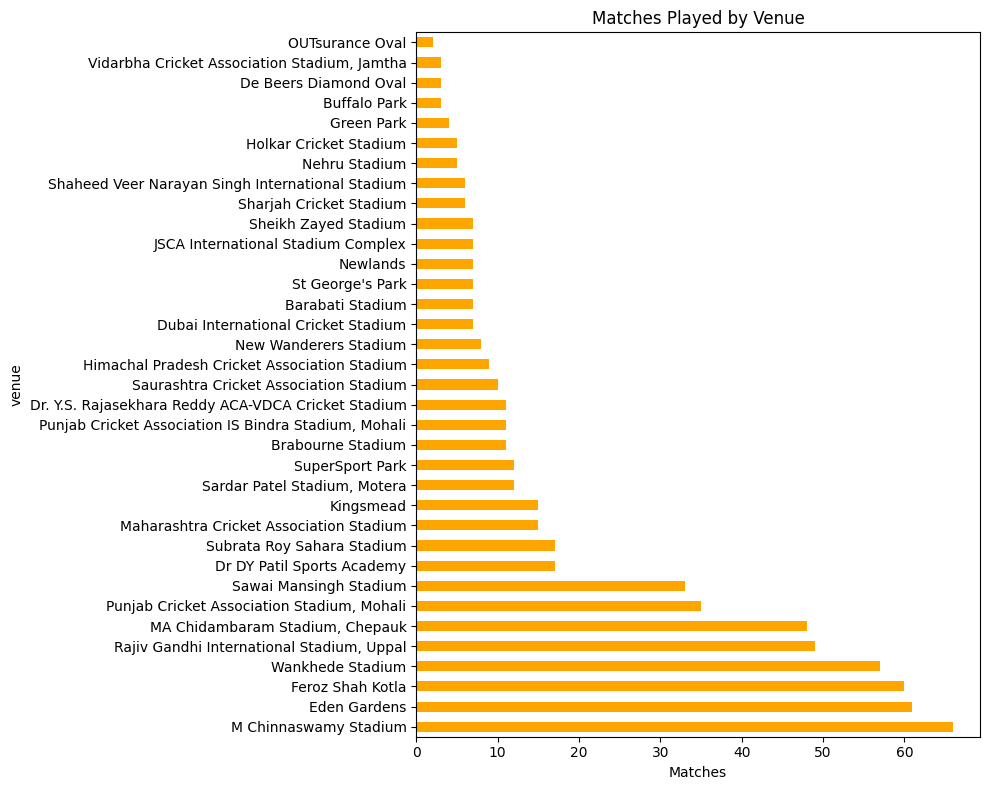

In [13]:
venue_counts = matches['venue'].value_counts()
print("Matches played per venue:\n", venue_counts)

venue_counts.plot(kind='barh', color='orange', figsize=(10, 8), title='Matches Played by Venue')
plt.xlabel('Matches')
plt.tight_layout()
plt.show()


Top 10 run scorers:
 batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64


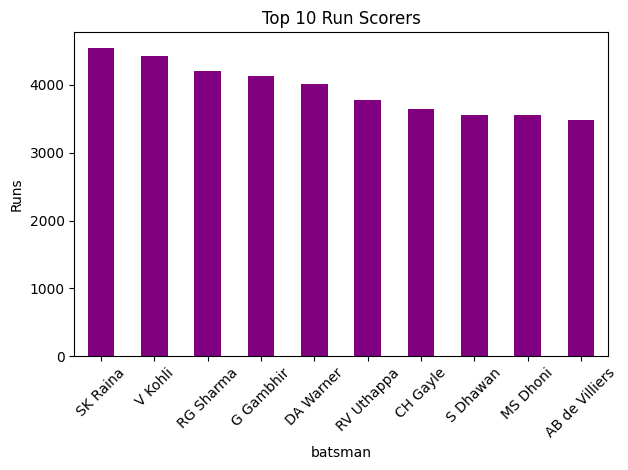

In [14]:
top_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 run scorers:\n", top_scorers)

top_scorers.plot(kind='bar', title='Top 10 Run Scorers', color='purple')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 wicket takers:
 bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
Name: count, dtype: int64


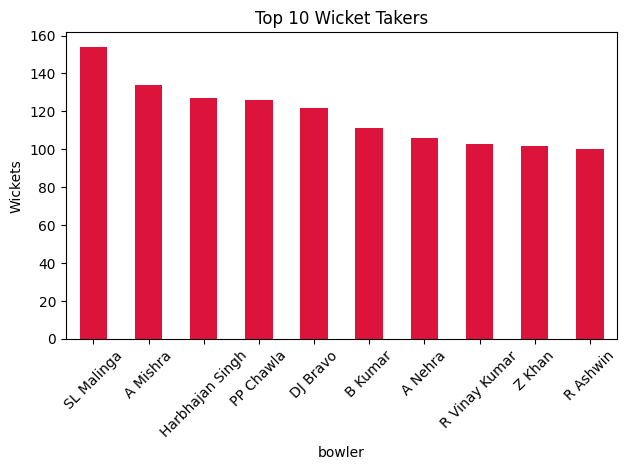

In [15]:
# Filtering valid dismissals
valid_dismissals = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket'])]
wicket_takers = valid_dismissals['bowler'].value_counts().head(10)
print("Top 10 wicket takers:\n", wicket_takers)

wicket_takers.plot(kind='bar', title='Top 10 Wicket Takers', color='crimson')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
batsman_stats = deliveries.groupby('batsman').agg({
    'ball': 'count',
    'batsman_runs': 'sum'
}).rename(columns={'ball': 'balls_faced', 'batsman_runs': 'runs'})

batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 200]
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls_faced']) * 100
top_strike_rates = batsman_stats.sort_values('strike_rate', ascending=False).head(10)

print("Top Strike Rates (min 200 balls):\n", top_strike_rates)


Top Strike Rates (min 200 balls):
                 balls_faced  runs  strike_rate
batsman                                       
AD Russell              350   574   164.000000
CH Morris               275   439   159.636364
GJ Maxwell              780  1229   157.564103
KH Pandya               313   480   153.354633
V Sehwag               1833  2728   148.827059
RR Pant                 381   564   148.031496
CA Lynn                 260   384   147.692308
AB de Villiers         2402  3486   145.129059
CH Gayle               2532  3651   144.194313
RA Tripathi             275   391   142.181818


In [17]:
# Count number of balls and runs conceded
bowler_stats = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
})

bowler_stats = bowler_stats[bowler_stats['ball'] >= 300]
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / (bowler_stats['ball'] / 6)
top_economy = bowler_stats.sort_values('economy_rate').head(10)

print("Top Economy Rates (min 300 balls):\n", top_economy)


Top Economy Rates (min 300 balls):
                   total_runs  ball  economy_rate
bowler                                          
SP Narine               2085  1956      6.395706
R Ashwin                2552  2359      6.490886
DW Steyn                2375  2159      6.600278
A Kumble                1089   983      6.646999
GD McGrath               366   329      6.674772
M Muralitharan          1765  1581      6.698292
Rashid Khan              368   328      6.731707
SL Malinga              3034  2694      6.757238
RE van der Merwe         515   455      6.791209
DL Vettori               894   785      6.833121


In [18]:
# Most successful team
matches['winner'].value_counts()

# Top batsmen
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Top bowlers
deliveries.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)


,dismissal_kind
bowler,
SL Malinga,170
A Mishra,142
DJ Bravo,137
Harbhajan Singh,136
PP Chawla,133
R Vinay Kumar,125
A Nehra,121
Z Khan,119
B Kumar,117


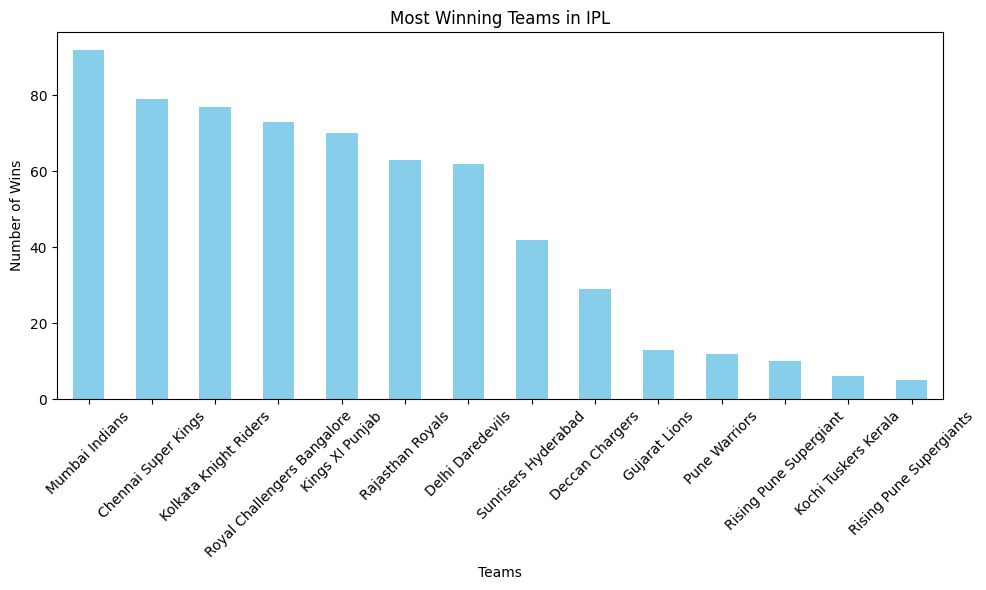

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

most_wins = matches['winner'].value_counts()

plt.figure(figsize=(10,6))
most_wins.plot(kind='bar', color='skyblue')
plt.title('Most Winning Teams in IPL')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


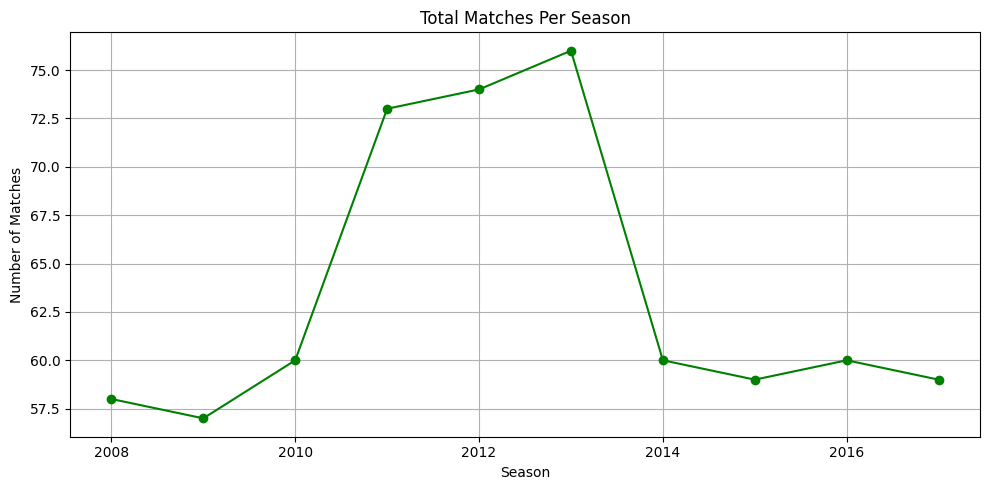

In [21]:
matches_per_year = matches['season'].value_counts().sort_index()

plt.figure(figsize=(10,5))
matches_per_year.plot(kind='line', marker='o', color='green')
plt.title('Total Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.tight_layout()
plt.show()


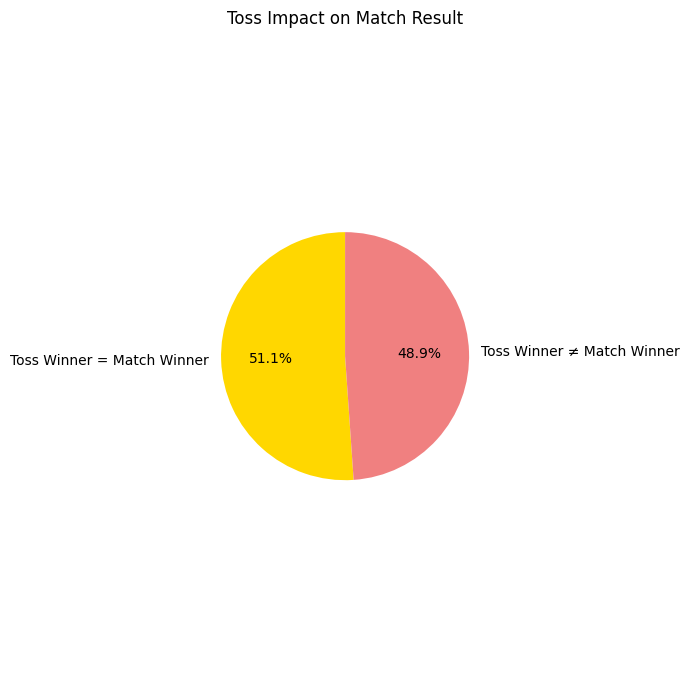

In [22]:
toss_match_same = matches[matches['toss_winner'] == matches['winner']].shape[0]
toss_match_diff = matches.shape[0] - toss_match_same

labels = ['Toss Winner = Match Winner', 'Toss Winner ≠ Match Winner']
sizes = [toss_match_same, toss_match_diff]
colors = ['gold', 'lightcoral']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Toss Impact on Match Result')
plt.axis('equal')
plt.tight_layout()
plt.show()


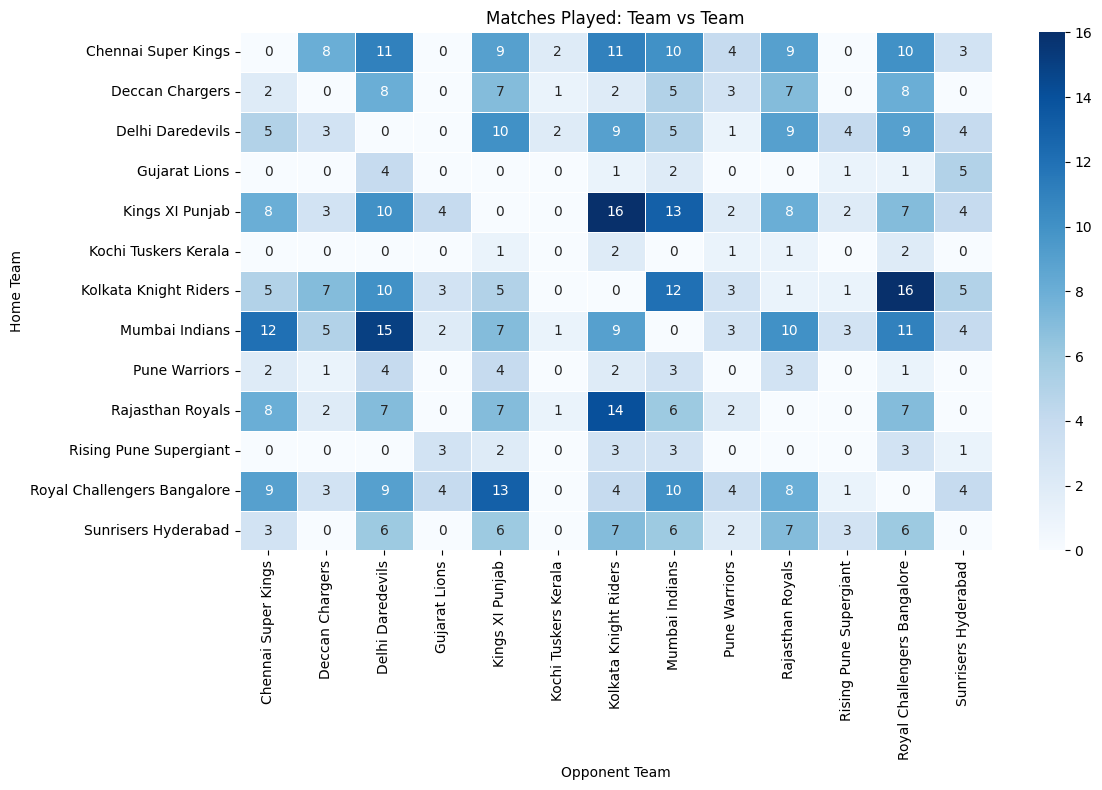

In [23]:
import seaborn as sns

# Create pivot table
team_vs_team = matches.pivot_table(index='team1', columns='team2', values='winner', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(team_vs_team, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Matches Played: Team vs Team')
plt.xlabel('Opponent Team')
plt.ylabel('Home Team')
plt.tight_layout()
plt.show()


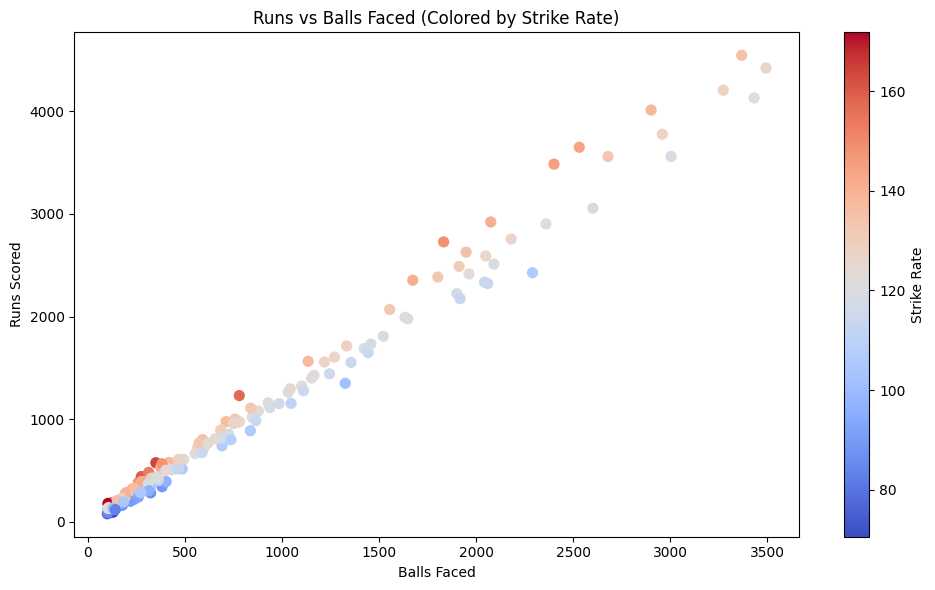

In [24]:
batsman_data = deliveries.groupby('batsman').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).rename(columns={'batsman_runs': 'runs', 'ball': 'balls'})

batsman_data = batsman_data[batsman_data['balls'] >= 100]
batsman_data['strike_rate'] = (batsman_data['runs'] / batsman_data['balls']) * 100

plt.figure(figsize=(10,6))
plt.scatter(batsman_data['balls'], batsman_data['runs'], c=batsman_data['strike_rate'], cmap='coolwarm', s=50)
plt.colorbar(label='Strike Rate')
plt.title('Runs vs Balls Faced (Colored by Strike Rate)')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.tight_layout()
plt.show()


In [25]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [26]:
import streamlit as st

st.title("IPL Analytics Dashboard")
team = st.selectbox("Select a Team", matches['team1'].unique())
st.write(f"Matches played by {team}")


2025-04-18 15:21:26.619 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.830 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-18 15:21:26.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 15:21:26.855 Session state does not 

In [28]:
!pip install streamlit
!pip install pyngrok


In [44]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.title("Hello IPL 🏏")
st.title("Welcome To IPL Data Analysis")
df = pd.read_csv("matches.csv")
st.write("Total matches:", df.shape[0])

team = st.selectbox("Select a team", df['team1'].unique())
team_data = df[df['team1'] == team]
st.write(f"Matches played by {team}:", team_data.shape[0])


Overwriting app.py


In [45]:
!ngrok config add-authtoken 2vuLJDNxHDHsDWTN0mSeNXCs0qc_7Uzxadbtk4yDJRH7DADSZ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [47]:
from pyngrok import ngrok
import os

# Kill any running ngrok tunnel
ngrok.kill()

# Start the Streamlit app
os.system("streamlit run app.py &")

# Connect to the port
public_url = ngrok.connect(8501)
print(f"👉 Streamlit app is live at: {public_url}")


👉 Streamlit app is live at: NgrokTunnel: "https://fbb8-34-58-23-233.ngrok-free.app" -> "http://localhost:8501"
